## Import library

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns

## Import dataset

In [2]:
df = pd.read_csv('datasets/netflix_titles.csv') 
# source https://www.kaggle.com/datasets/shivamb/netflix-shows/code?datasetId=434238&sortBy=voteCount

First let check the dataset

In [3]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info() #check column type of the dataset and infomation 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


It is clear that this dataset has 14 column 

Check is there are na in our dataset

In [5]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

as you can see from above there are some na in our dataset espectially in director column

## Analysis of the number of Movies vs TV Shows

<AxesSubplot:xlabel='type', ylabel='count'>

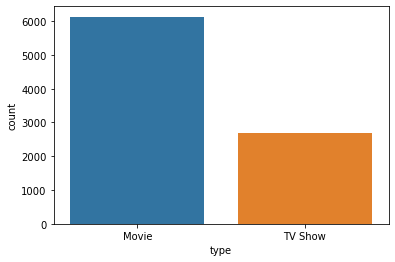

In [6]:
sns.countplot(x='type',data=df)

it's show that there are more Movie than TV show on NETFLIX

## Analysis of the number of rating

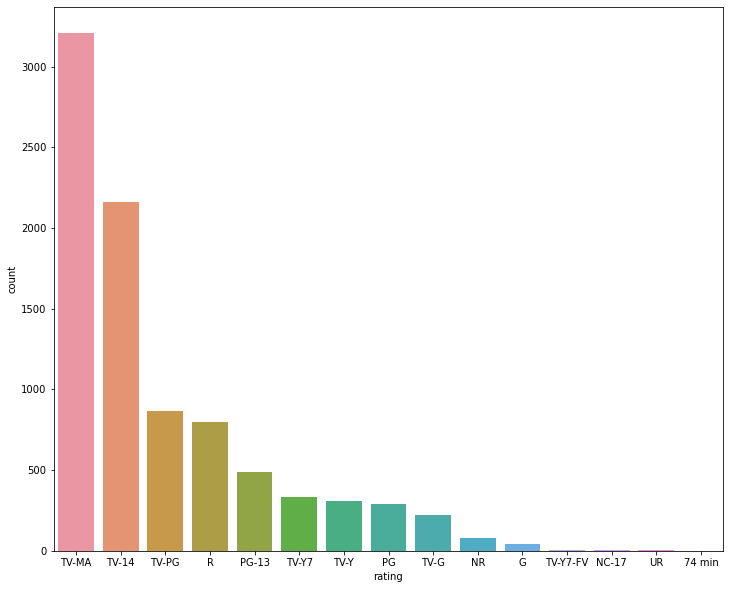

In [7]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x='rating',data=df,order=df['rating'].value_counts().index[0:15])

# ax.tick_params(axis="x", labelrotation=90)

TV-MA(or rate 18+) is the highest count on netflix.

"TV-MA" is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17

Following by TV-14 which is the content for chuldren younger than 14 years old



## Date added analysis

In [8]:
df['date_added'] = pd.to_datetime(df['date_added']) # change datatype to datetime

In [9]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [10]:
df['month_added'] = df['date_added'].dt.month_name() 
df['year_added'] = df['date_added'].dt.year.convert_dtypes()

In [11]:
df['month_added']

0       September
1       September
2       September
3       September
4       September
          ...    
8802     November
8803         July
8804     November
8805      January
8806        March
Name: month_added, Length: 8807, dtype: object

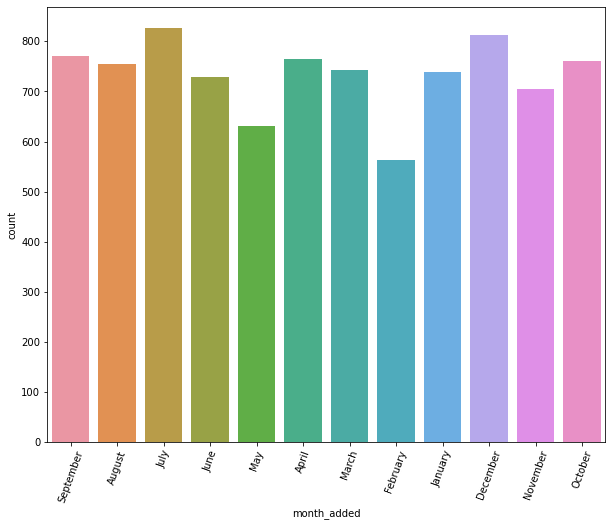

In [12]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='month_added',data=df)
ax.tick_params(axis="x", labelrotation=70)

we can see that Netflix add new movie or tv show at around 700 per month

<AxesSubplot:xlabel='year_added', ylabel='count'>

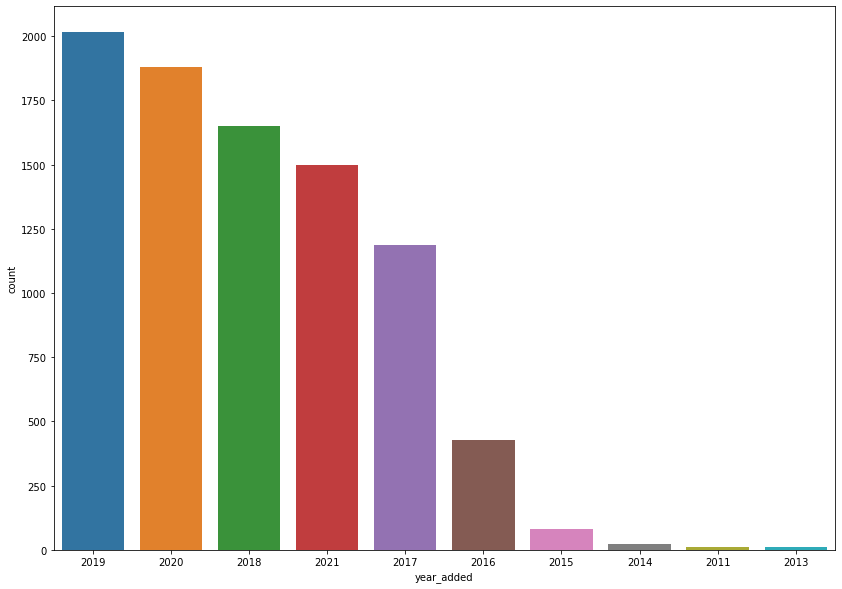

In [13]:
plt.figure(figsize=(14,10))
sns.countplot(x='year_added',data=df,order=df['year_added'].value_counts().index[0:10])

So, Netflix add most of their movie on 2019

## Top 5 release country analysis 

In [14]:
df['country'].value_counts().sort_values(ascending=False).head(5)

United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Name: country, dtype: int64

<AxesSubplot:xlabel='country', ylabel='count'>

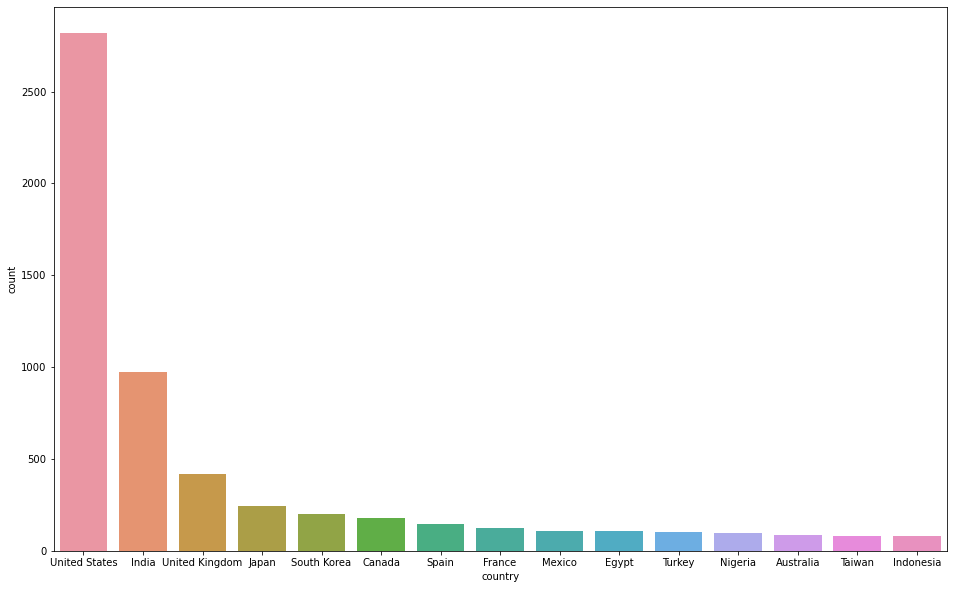

In [15]:
plt.figure(figsize=(16,10))
sns.countplot(x='country',data=df,order=df['country'].value_counts().index[0:15])

Most of title that Netflix release on their platfrom come from United States

## Year analysis 

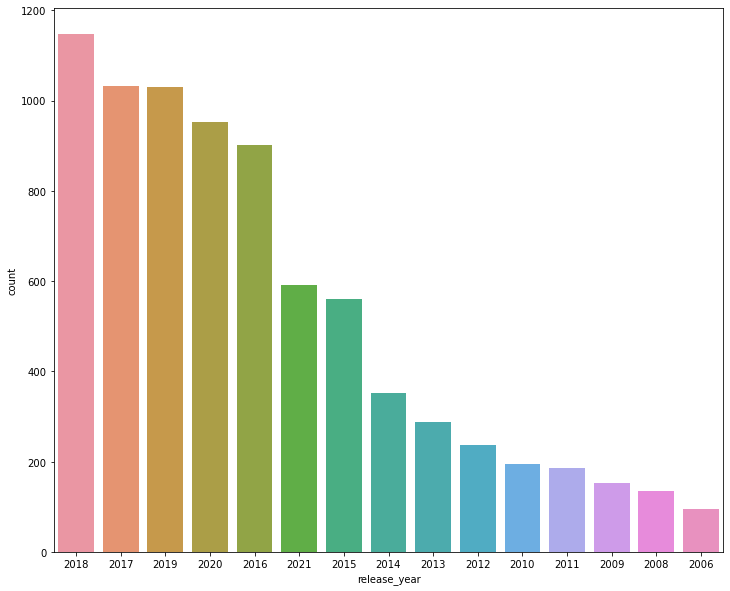

In [16]:
plt.figure(figsize=(12,10))
ax = sns.countplot(x='release_year',data=df,order=df['release_year'].value_counts().index[0:15])

2018 was the year that Nerflix release the most

## Analysis duration of movies

In [17]:
movie_df = df.loc[df['type']=='Movie'] # select only movie
movie_df['duration']=df['duration'].str.replace(' min','')

In [18]:
movie_df['duration'] = movie_df['duration'].astype('Int64')

### Handle na on movie duration

In [19]:
movie_df['duration'].describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration, dtype: float64

<AxesSubplot:xlabel='duration', ylabel='Count'>

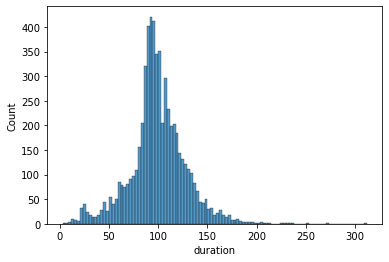

In [20]:
sns.histplot(x='duration',data=movie_df) 

we can see that movie duration has normal dritribution so we going to fill na with mean

In [21]:
movie_df['duration'] = movie_df['duration'].fillna(movie_df['duration'].mean().astype(int))

<AxesSubplot:xlabel='duration', ylabel='Density'>

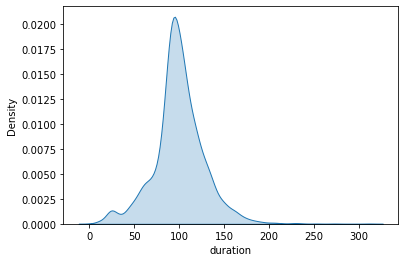

In [22]:
sns.kdeplot(x='duration',data=movie_df, shade=True)

From the plot, it is clear that the duration of movies are around 100 min

## Analysis  TV Show

In [23]:
TV_Show_df = df.loc[df['type']=='TV Show']
TV_Show_df['duration'].value_counts()

1 Season      1793
2 Seasons      425
3 Seasons      199
4 Seasons       95
5 Seasons       65
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       7
13 Seasons       3
15 Seasons       2
12 Seasons       2
11 Seasons       2
17 Seasons       1
Name: duration, dtype: int64

<AxesSubplot:xlabel='duration', ylabel='count'>

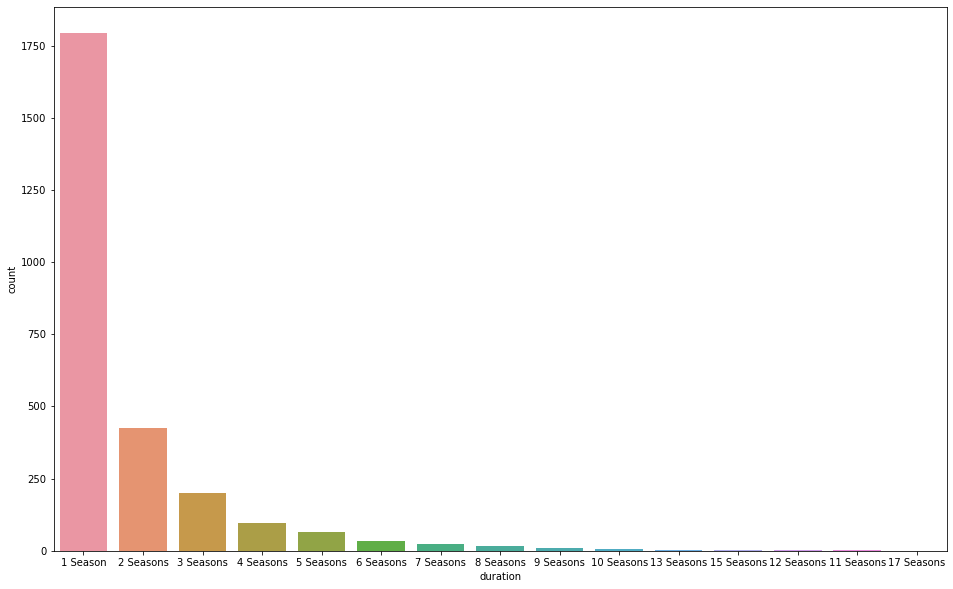

In [24]:
plt.figure(figsize=(16,10))
sns.countplot(x='duration',data=TV_Show_df,order=TV_Show_df['duration'].value_counts().index[0:15])

As you can see most of the TV show have only 1 season

### Find which TV show has the most season

In [25]:
# handle missing value 
TV_Show_df['duration']=TV_Show_df['duration'].str.extract('(\d+)', expand=False)
TV_Show_df['duration']= TV_Show_df['duration'].fillna(1)
TV_Show_df['duration'] = TV_Show_df['duration'].astype(int)

<AxesSubplot:xlabel='title', ylabel='duration'>

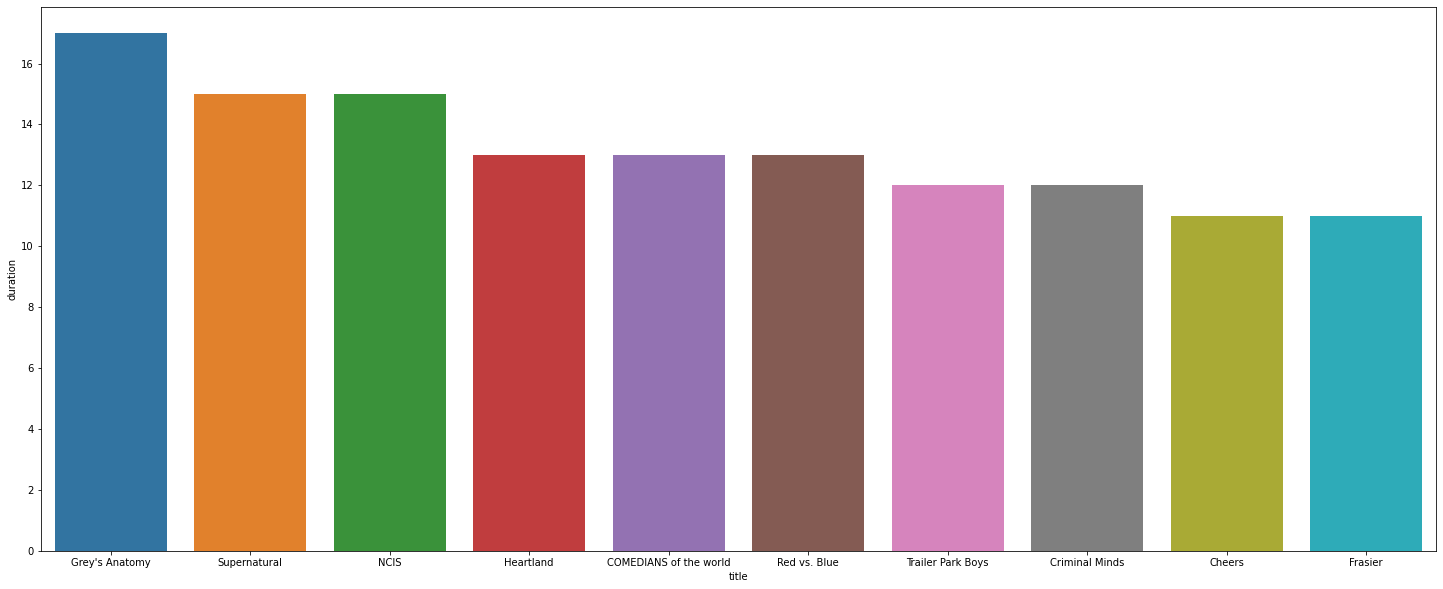

In [26]:

# result = TV_Show_df.groupby(["title"])['duration'].aggregate(np.median).reset_index().sort_values('duration',ascending=False)
plt.figure(figsize=(25,10))
sns.barplot(x='title',y='duration',data=TV_Show_df.nlargest(n=10, columns='duration'))

we can see that most of the TV series are 1 season with more than 1250 series

## Find world frequencies on description

In [27]:
# from sklearn.feature_extraction import text
# stop = text.ENGLISH_STOP_WORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['tweet_without_stopwords'] = df['description'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in (stop)]))
df['tweet_without_stopwords'].str.split(expand=True).stack().value_counts()[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Same\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


young      686
–          606
life       571
new        540
family     446
man        441
woman      415
must       397
friends    359
two        357
dtype: int64

This indicate that young,life and new seem to be the most popular word description for TV show and Movies